In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataFrame = pd.read_csv("merc.csv")

In [3]:
dataFrame.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

/var/folders/hb/6vhmt17521bdwt6h_z58v6h40000gn/T/ipykernel_1618/281510803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame["price"])


<Axes: xlabel='price', ylabel='Density'>

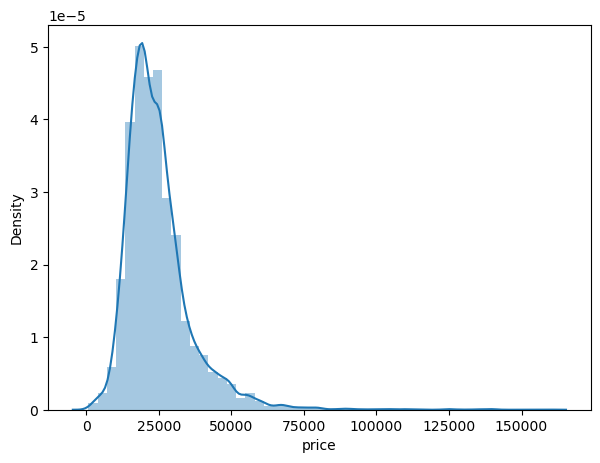

In [6]:
plt.figure(figsize=(7,5))
sns.distplot(dataFrame["price"])

In [7]:
dataFrame = dataFrame.drop(["model"],axis=1)

In [8]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [9]:
dataFrame.corr()

ValueError: could not convert string to float: 'Automatic'

In [ ]:
dataFrame = dataFrame.drop(["transmission"],axis=1)

In [ ]:
dataFrame.corr()

In [ ]:
dataFrame = dataFrame.drop(["fuelType"])

In [ ]:
dataFrame.corr()

In [ ]:
sns.countplot(dataFrame["year"])

In [ ]:
dataFrame.corr()["price"].sort_values()

In [ ]:
sns.scatterplot(x="mileage", y="price",data=dataFrame)

In [ ]:
dataFrame.sort_values("price",ascending=False).head(20)

In [ ]:
len(dataFrame)

In [ ]:
len(dataFrame) * 0.01

In [ ]:
betterDF = dataFrame.sort_values("price",ascending=False).iloc[131:]

In [ ]:
betterDF.describe()

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(betterDF["price"])

In [ ]:
betterDF[betterDF.year != 1970].groupby("year").mean()["price"]

In [ ]:
y = betterDF["price"].values
x = betterDF.drop("price",axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=10)

In [ ]:
len(x_train)

In [ ]:
len(x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x_train.shape

In [ ]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")


In [10]:
model.fit(x=x_train, y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

NameError: name 'model' is not defined